**L1 and L2 Regularization**

What is **Regularization**?

Regularization is a proccess of adding additional information in order to prevent ovefitting.

L1 Ridge Regression
L2 Lasso Regression

Formula of Ridge

```
loss + (alpha)(sum of 
magnitude of independent variables)^2
```



Formula of Lasso

```
loss + (alpha)(sum of 
magnitude of independent variables)
```



**Implemention Start's Here**

In [11]:
import pandas as pd

names = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']

URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"

df = pd.read_csv(URL, delim_whitespace = True, names = names)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [12]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1].values
Y = df.iloc[:, -1].values

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [13]:
print("Shape of X is",X.shape)
print("Shape of Y is",Y.shape)

Shape of X is (506, 13)
Shape of Y is (506,)


**importing Libraries**

In [14]:
from sklearn import linear_model
import matplotlib.pyplot as plt

In [15]:
names = df.drop('medv', axis = 1).columns

**Implementing Lasso Regression**

In [53]:
# Alpha is a penality Value
lasso = linear_model.Lasso(alpha = 2)


In [54]:
model = lasso.fit(X_train, y_train)

In [55]:
model.coef_

array([-0.00775491,  0.04020696, -0.        ,  0.        , -0.        ,
        0.        ,  0.03937946, -0.03512867,  0.09764718, -0.01012518,
       -0.70670251,  0.00528235, -0.77801894])

In [56]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, model.predict(X_test))

46.9098018806607

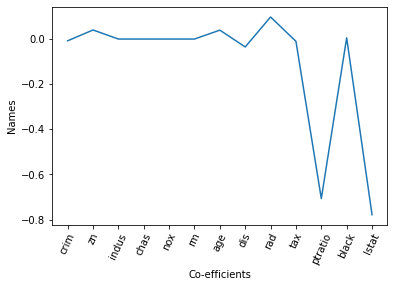

In [20]:
plt.plot(range(len(names)), model.coef_)
plt.xticks(range(len(names)), names, rotation = 65)
plt.xlabel("Co-efficients")
plt.ylabel("Names")
plt.show()

In [22]:
# Those variables whose values reduces below zero are affected due to lasso regression alpha value
# Below zero means the corresponding varables are removed

**Ridge Regression**

In [23]:
ridge = linear_model.Ridge(alpha = 2)

In [24]:
model = ridge.fit(X_train, y_train)

In [25]:
model.coef_

array([-0.11588483,  0.04657432, -0.03427504,  2.20558835, -5.8289038 ,
        3.74962755, -0.01285868, -1.24237268,  0.21501334, -0.01176243,
       -0.94295864,  0.00868351, -0.50265982])

In [52]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, model.predict(X_test))

34.644438003541424

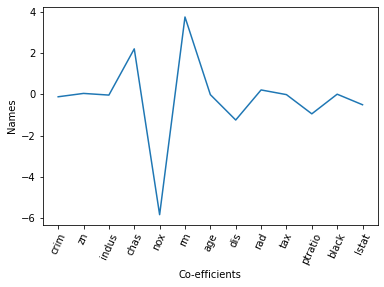

In [26]:
plt.plot(range(len(names)), model.coef_)
plt.xticks(range(len(names)), names, rotation = 65)
plt.xlabel("Co-efficients")
plt.ylabel("Names")
plt.show()

**Now if StandardScaler is Used**

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

std_x = sc.fit_transform(X_train)

**Now if i implement's Lasso and Ridge**

In [57]:
lasso = linear_model.Lasso(alpha = 0.2)
ridge = linear_model.Ridge(alpha = 0.2)

model_lasso = lasso.fit(std_x, y_train)
model_ridge = ridge.fit(std_x, y_train)

coef_lasso = model_lasso.coef_
coef_ridge = model_ridge.coef_
print("The Intecept of Lasso is",model_lasso.intercept_)
print("The Intecept of Ridge is",model_ridge.intercept_)
print("The Coef of Lasso is",coef_lasso)
print("The Coef of Ridge is",coef_ridge)

The Intecept of Lasso is 22.611881188118836
The Intecept of Ridge is 22.611881188118836
The Coef of Lasso is [-0.47463233  0.381009   -0.10796867  0.54564167 -0.94424971  2.82477192
 -0.         -1.45186826  0.         -0.15733419 -2.12679389  0.53740595
 -3.60225157]
The Coef of Ridge is [-0.96906797  1.05381915  0.03280944  0.5953749  -1.84802333  2.57538903
 -0.08916904 -2.87433817  2.09659994 -1.86101986 -2.29082237  0.7182033
 -3.58914471]


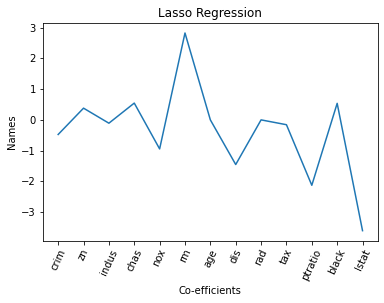

In [58]:
plt.plot(range(len(names)), coef_lasso)
plt.xticks(range(len(names)), names, rotation = 65)
plt.xlabel("Co-efficients")
plt.ylabel("Names")
plt.title("Lasso Regression")
plt.show()

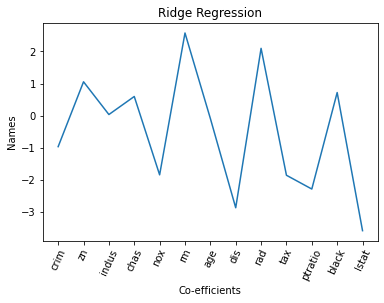

In [59]:
plt.plot(range(len(names)), coef_ridge)
plt.xticks(range(len(names)), names, rotation = 65)
plt.xlabel("Co-efficients")
plt.ylabel("Names")
plt.title("Ridge Regression")
plt.show()

In [60]:
# After Doing Experiments I think Ridge And StandScaler is Good Combination for Regression.

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


sc = StandardScaler()

std_x_test = sc.fit_transform(X_test)
l_pred = model_lasso.predict(std_x_test)
r_pred = model_ridge.predict(std_x_test)

In [62]:
mean_squared_error(y_test, l_pred)

38.141435620052256

In [63]:
mean_squared_error(y_test, r_pred)

35.13099067426668

**What does the Mean Squared Error Tell You?**

The smaller the means squared error, the closer you are to finding the line of best fit. Depending on your data, it may be impossible to get a very small value for the mean squared error. For example, the above data is scattered wildly around the regression line, so 6.08 is as good as it gets (and is in fact, the line of best fit). Note that I used an online calculator to get the regression line; where the mean squared error really comes in handy is if you were finding an equation for the regression line by hand: you could try several equations, and the one that gave you the smallest mean squared error would be the line of best fit.